In [12]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [13]:
class StockMarket:
    def __init__(self, initial_price=100, volatility=1.0):
        self.current_price = initial_price
        self.volatility = volatility

    def step(self):
        change = random.uniform(-self.volatility, self.volatility)
        self.current_price += change
        self.current_price = max(self.current_price, 0)  # Prevent negative prices
        return self.current_price


In [14]:

class Trader:
    def __init__(self, initial_balance=1000, epsilon=0.1, alpha=0.1, gamma=0.9):
        self.balance = initial_balance
        self.stock = 0 
        self.epsilon = epsilon
        self.alpha = alpha  # Learning rate
        self.gamma = gamma 
        self.q_table = {}  # Q-table for storing (state, action) -> value
        self.last_state = None
        self.last_action = None
        self.last_reward = 0

    def get_state(self, price_history):
        return tuple(price_history)

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return random.choice([0, 1, 2])  # 0 = buy, 1 = sell, 2 = hold
        else:
            # choose the best action according to the Q-table
            if state not in self.q_table:
                self.q_table[state] = [0, 0, 0]
            return np.argmax(self.q_table[state])

    def update_q_table(self, state, action, reward, next_state):
        if state not in self.q_table:
            self.q_table[state] = [0, 0, 0]
        if next_state not in self.q_table:
            self.q_table[next_state] = [0, 0, 0]

        current_q = self.q_table[state][action]
        max_future_q = np.max(self.q_table[next_state])

        new_q = current_q + self.alpha * (reward + self.gamma * max_future_q - current_q)
        self.q_table[state][action] = new_q

    def take_action(self, action, current_price):
        if action == 0:
            if self.balance >= current_price:
                self.balance -= current_price
                self.stock += 1
                return -current_price  # Negative reward for spending money
        elif action == 1:
            if self.stock > 0:
                self.balance += current_price
                self.stock -= 1
                return current_price  # Positive reward for selling stock
        elif action == 2:
            return 0  # No reward for holding stock
        return 0

In [15]:
def simulate_stock_market(num_steps=1000):
    market = StockMarket(initial_price=100)
    trader = Trader(initial_balance=1000)

    price_history = []
    balances = [trader.balance]

    for step in range(num_steps):
        current_price = market.step()
        price_history.append(current_price)
        if len(price_history) > 10:
            price_history.pop(0)  # Keep only the last 10 prices
        
        state = trader.get_state(price_history)
        action = trader.choose_action(state)
        reward = trader.take_action(action, current_price)
        
        next_state = trader.get_state(price_history)
        trader.update_q_table(state, action, reward, next_state)

        trader.last_state = state
        trader.last_action = action
        trader.last_reward = reward

        balances.append(trader.balance + trader.stock * current_price)

    return balances

In [16]:
def plot_results(balances):
    plt.plot(balances)
    plt.xlabel('Time steps')
    plt.ylabel('Balance ($)')
    plt.title('Trader Performance Over Time')
    plt.show()

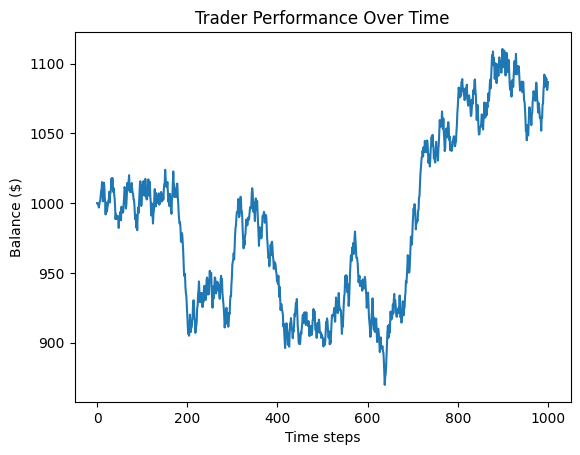

In [17]:
if __name__ == "__main__":
    # simulate the stock market for 1000 steps
    balances = simulate_stock_market(num_steps=1000)
    
    plot_results(balances)